In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns


**Loading the Dataset**

In [ ]:
import io
import pandas as pd
from google.colab import files

# Upload the file
uploaded = files.upload()

# Get the actual key from the 'uploaded' dictionary
file_key = list(uploaded.keys())[0]  # Assuming only one file is uploaded

# Read the Excel file using the correct key
df = pd.read_excel(io.BytesIO(uploaded[file_key]))

# Display the first few rows of the dataframe
df.head()

Saving penguins_size.xlsx.xlsx to penguins_size.xlsx (3).xlsx


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [ ]:
import io
import pandas as pd
from google.colab import files

# Upload the file
uploaded = files.upload()

# Get the actual key from the 'uploaded' dictionary
file_key = list(uploaded.keys())[0]  # Assuming only one file is uploaded

# Read the Excel file using the correct key
df = pd.read_excel(io.BytesIO(uploaded[file_key]))

# Display the first few rows of the dataframe
df.head()

Saving penguins_lter.xlsx.xlsx to penguins_lter.xlsx (2).xlsx


,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,2011-11-07 00:00:00,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2011-11-07 00:00:00,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


**Inspecting the Data**



In [ ]:
# Display the first few rows
print("\nFirst 5 rows of the dataset:")
print(df.head())

# Get the shape of the DataFrame (number of rows and columns)
print("\nShape of the dataset:", df.shape)

# Get information about the data types and missing values
print("\nData types and missing values:")
print(df.info())



First 5 rows of the dataset:
  studyName  Sample Number                              Species  Region  \
0   PAL0708              1  Adelie Penguin (Pygoscelis adeliae)  Anvers   
1   PAL0708              2  Adelie Penguin (Pygoscelis adeliae)  Anvers   
2   PAL0708              3  Adelie Penguin (Pygoscelis adeliae)  Anvers   
3   PAL0708              4  Adelie Penguin (Pygoscelis adeliae)  Anvers   
4   PAL0708              5  Adelie Penguin (Pygoscelis adeliae)  Anvers   

      Island               Stage Individual ID Clutch Completion  \
0  Torgersen  Adult, 1 Egg Stage          N1A1               Yes   
1  Torgersen  Adult, 1 Egg Stage          N1A2               Yes   
2  Torgersen  Adult, 1 Egg Stage          N2A1               Yes   
3  Torgersen  Adult, 1 Egg Stage          N2A2               Yes   
4  Torgersen  Adult, 1 Egg Stage          N3A1               Yes   

              Date Egg  Culmen Length (mm)  Culmen Depth (mm)  \
0  2011-11-07 00:00:00                39.1   

**Descriptive statistics for numerical columns**

In [ ]:

print("\nDescriptive statistics for numerical columns:")
print(df.describe())




Descriptive statistics for numerical columns:
       Sample Number  Culmen Length (mm)  Culmen Depth (mm)  \
count     344.000000          342.000000         342.000000   
mean       63.151163           43.921930          17.151170   
std        40.430199            5.459584           1.974793   
min         1.000000           32.100000          13.100000   
25%        29.000000           39.225000          15.600000   
50%        58.000000           44.450000          17.300000   
75%        95.250000           48.500000          18.700000   
max       152.000000           59.600000          21.500000   

       Flipper Length (mm)  Body Mass (g)  Delta 15 N (o/oo)  \
count           342.000000     342.000000         330.000000   
mean            200.915205    4201.754386           8.733382   
std              14.061714     801.954536           0.551770   
min             172.000000    2700.000000           7.632200   
25%             190.000000    3550.000000           8.299890   
5

***Descriptive statistics for all columns including non-numerical ***

In [ ]:
print("\nDescriptive statistics for all columns (including non-numerical):")
print(df.describe(include='all'))



Descriptive statistics for all columns (including non-numerical):
       studyName  Sample Number                              Species  Region  \
count        344     344.000000                                  344     344   
unique         3            NaN                                    3       1   
top      PAL0910            NaN  Adelie Penguin (Pygoscelis adeliae)  Anvers   
freq         120            NaN                                  152     344   
mean         NaN      63.151163                                  NaN     NaN   
std          NaN      40.430199                                  NaN     NaN   
min          NaN       1.000000                                  NaN     NaN   
25%          NaN      29.000000                                  NaN     NaN   
50%          NaN      58.000000                                  NaN     NaN   
75%          NaN      95.250000                                  NaN     NaN   
max          NaN     152.000000                      

**Handling missing values**

In [ ]:

missing_values = df.isnull().sum()
print("\nMissing values per column:\n", missing_values)

# Impute numerical missing values with the median
for col in df.select_dtypes(include=np.number).columns:
    df[col] = df[col].fillna(df[col].median())

# Impute categorical missing values with the mode
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].fillna(df[col].mode()[0])  # Use mode()[0] in case multiple modes exist

# Verify that missing values have been handled
print("\nMissing values after imputation:")
print(df.isnull().sum())



Missing values per column:
 studyName                0
Sample Number            0
Species                  0
Region                   0
Island                   0
Stage                    0
Individual ID            0
Clutch Completion        0
Date Egg                 0
Culmen Length (mm)       2
Culmen Depth (mm)        2
Flipper Length (mm)      2
Body Mass (g)            2
Sex                     10
Delta 15 N (o/oo)       14
Delta 13 C (o/oo)       13
Comments               318
dtype: int64

Missing values after imputation:
studyName              0
Sample Number          0
Species                0
Region                 0
Island                 0
Stage                  0
Individual ID          0
Clutch Completion      0
Date Egg               0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Body Mass (g)          0
Sex                    0
Delta 15 N (o/oo)      0
Delta 13 C (o/oo)      0
Comments               0
dtype: int64


**Histograms for Numerical Columns**

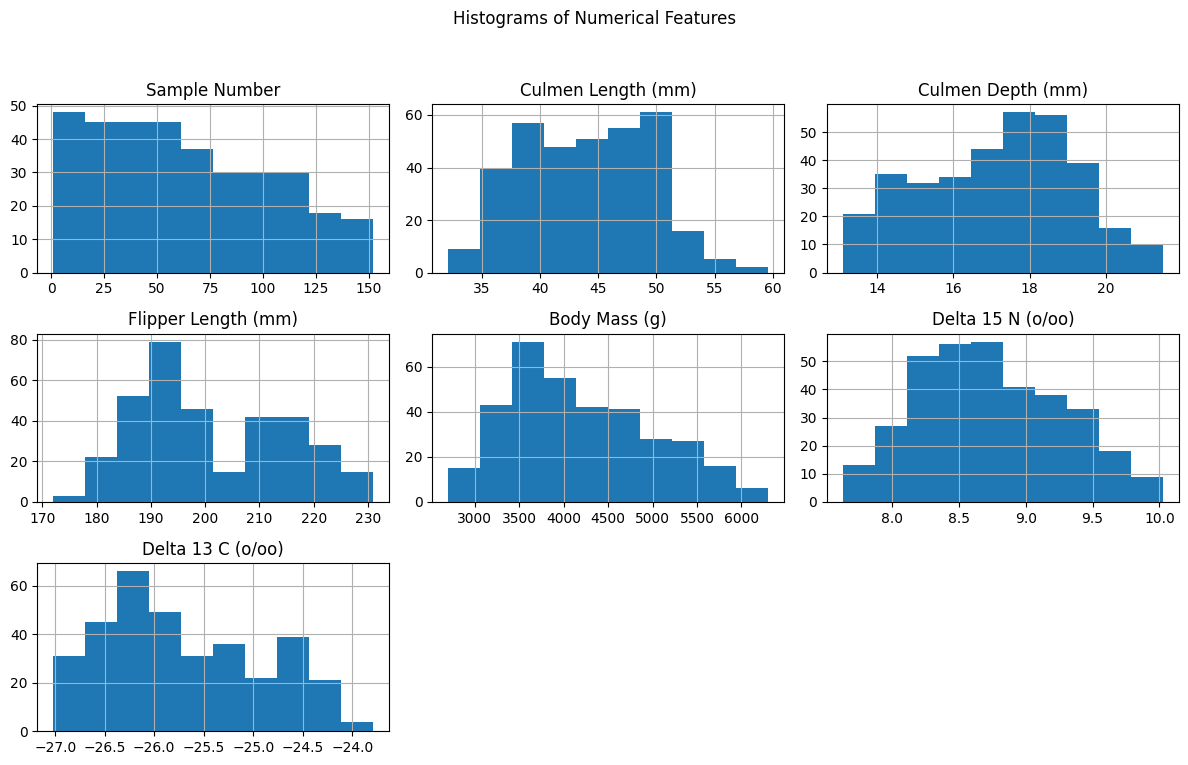

In [ ]:
numerical_cols = df.select_dtypes(include=np.number).columns
df[numerical_cols].hist(figsize=(12, 8))
plt.suptitle("Histograms of Numerical Features", fontsize=12)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to prevent overlap
plt.show()


**Count Plots for Categorical Columns**

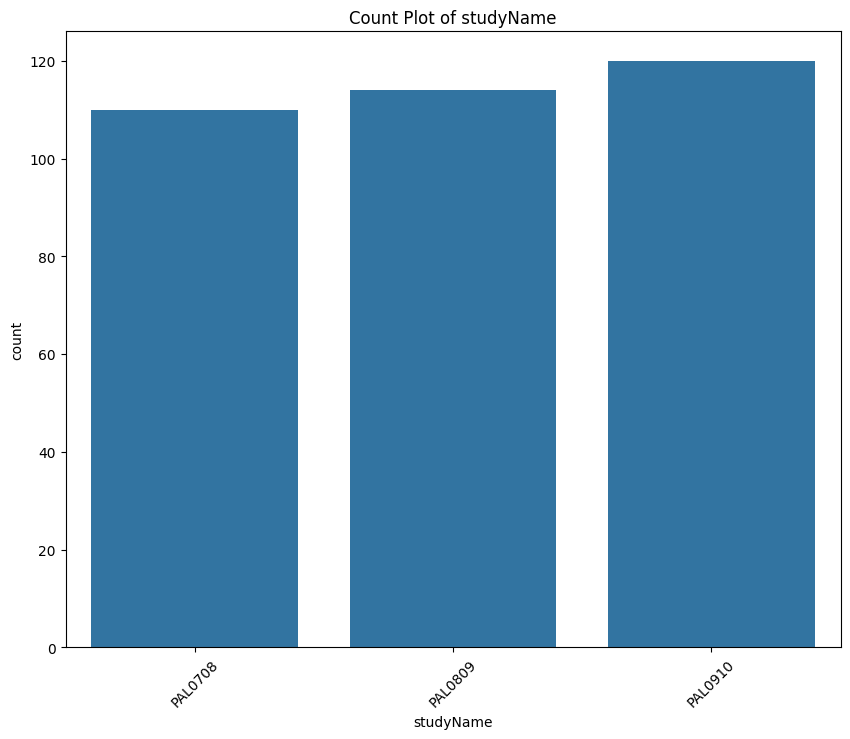

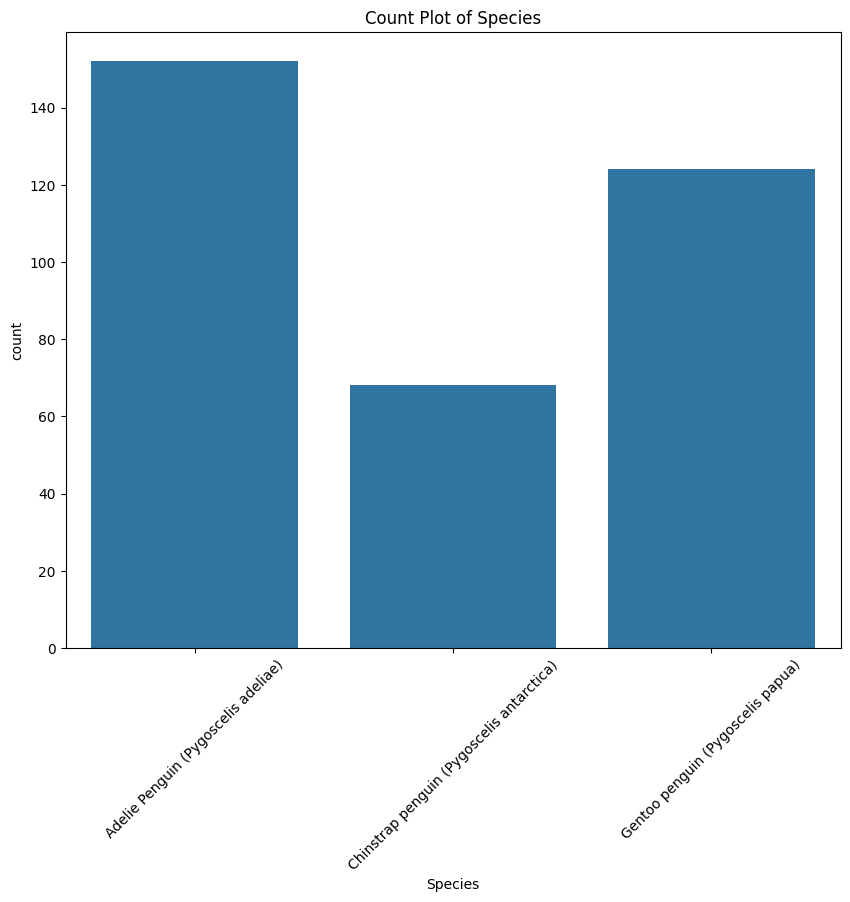

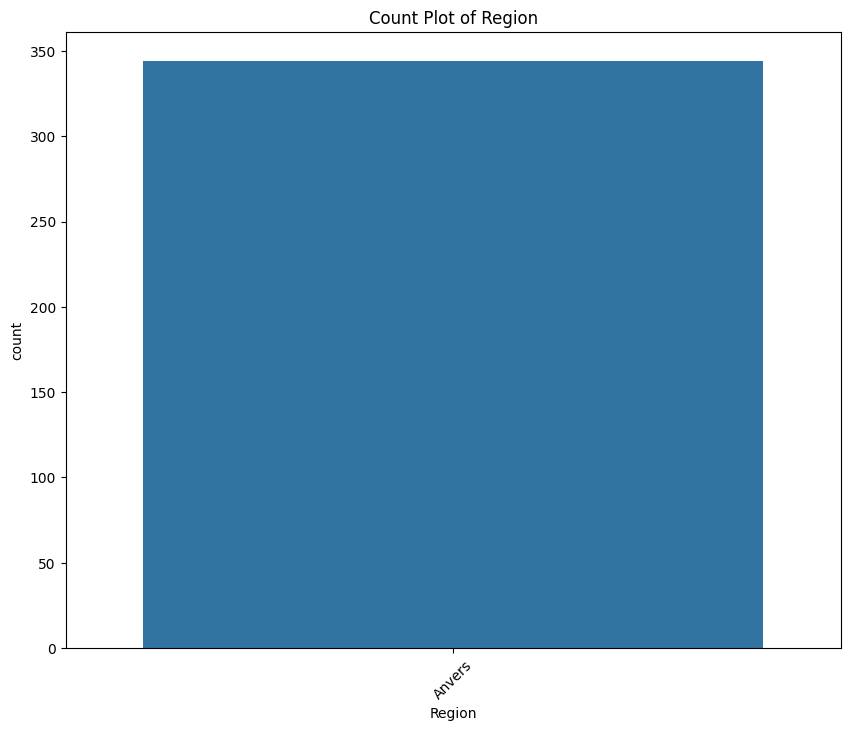

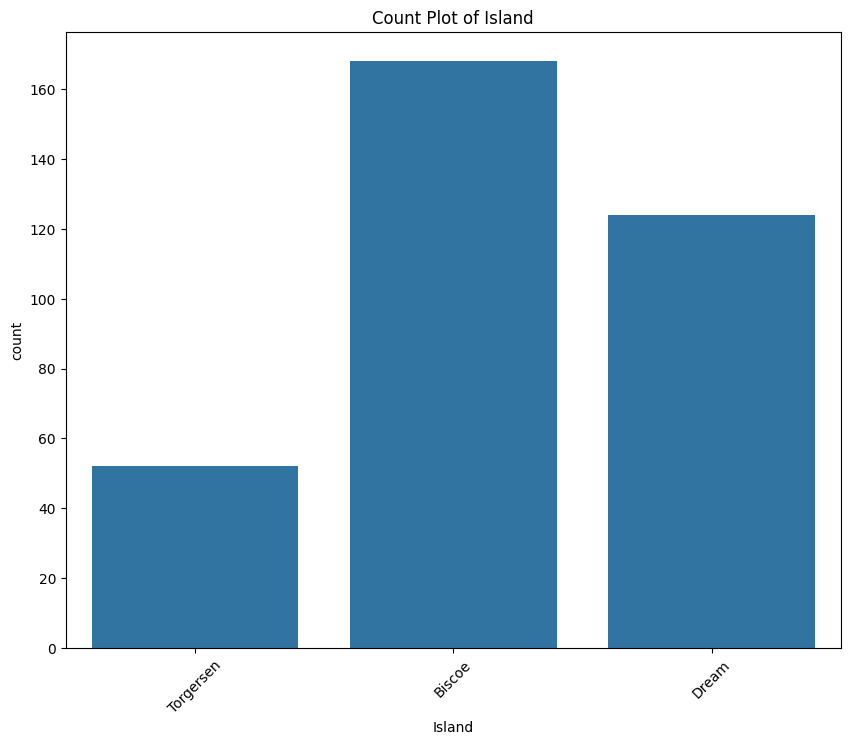

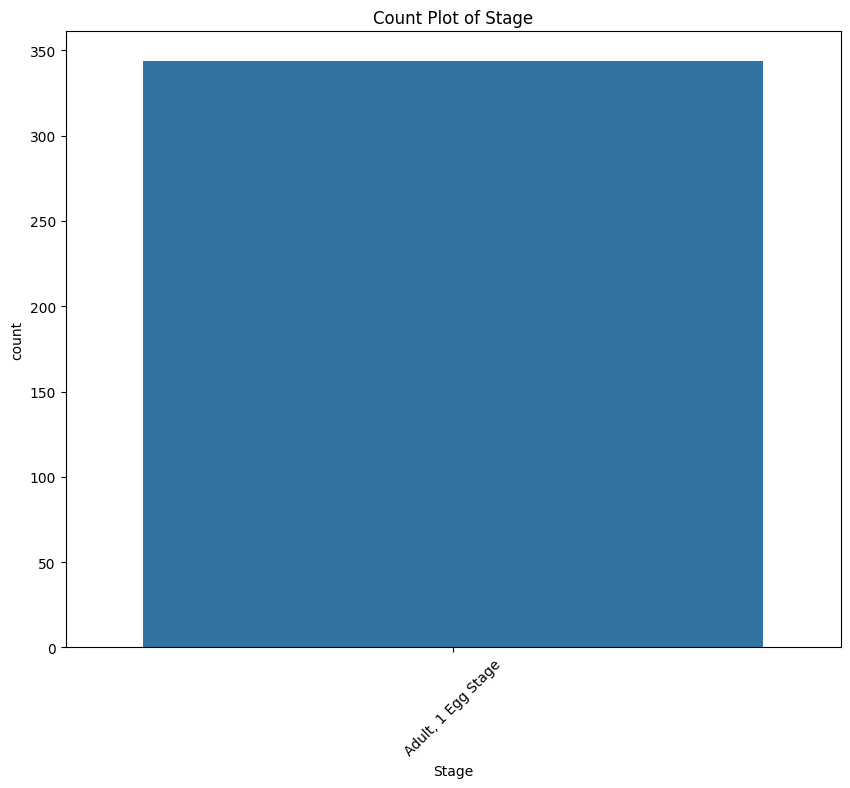

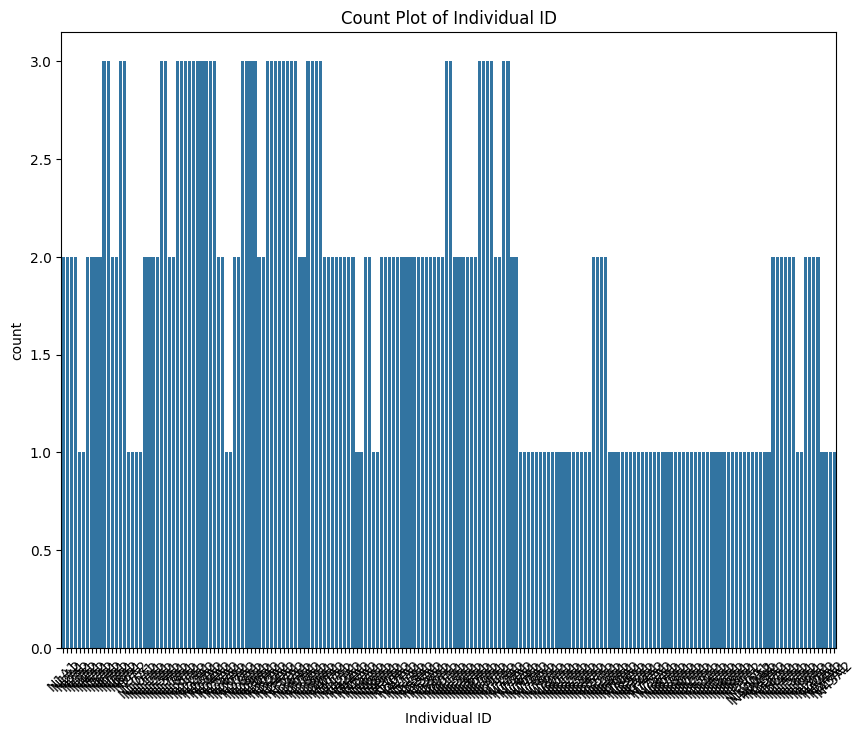

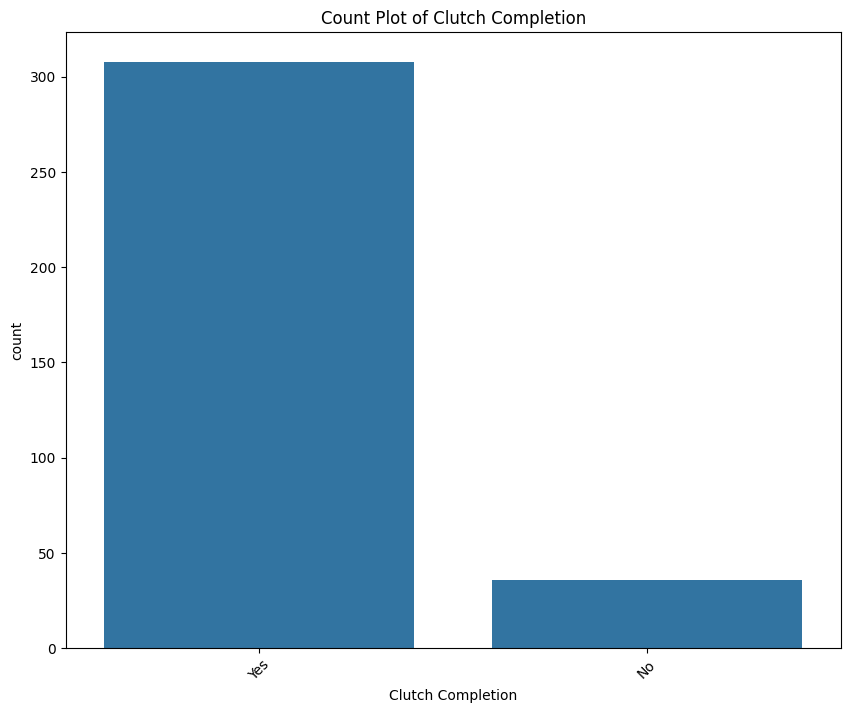

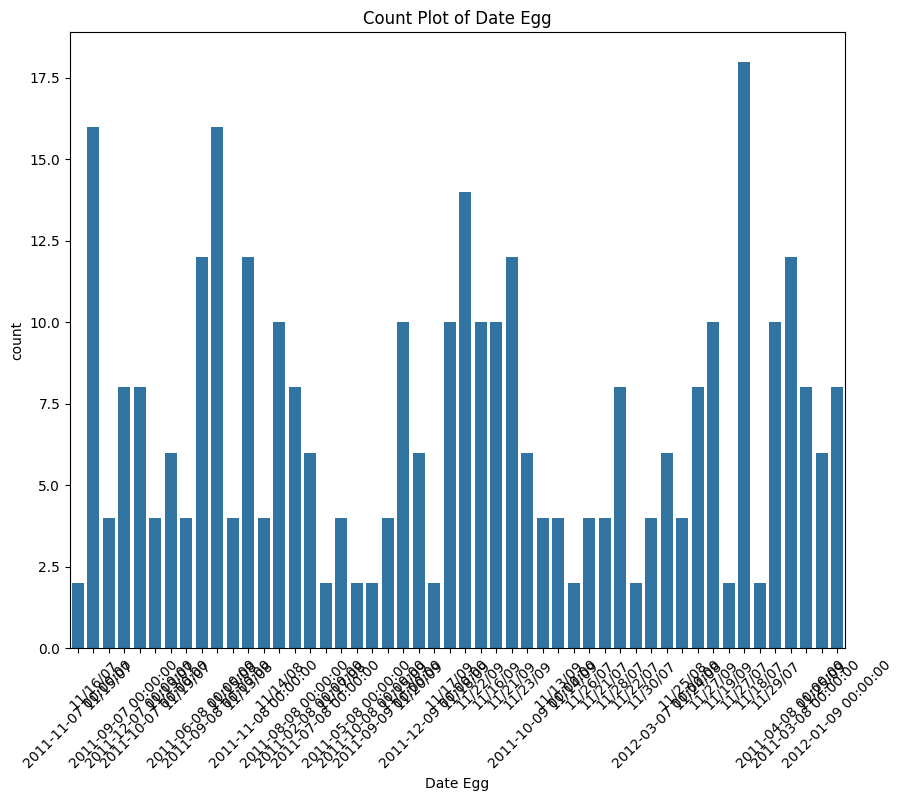

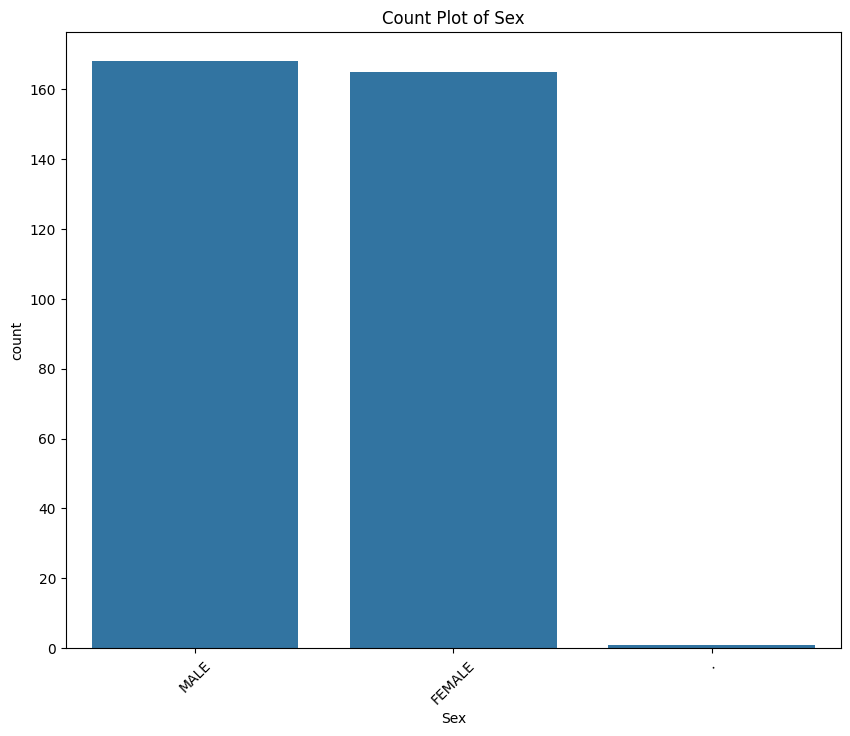

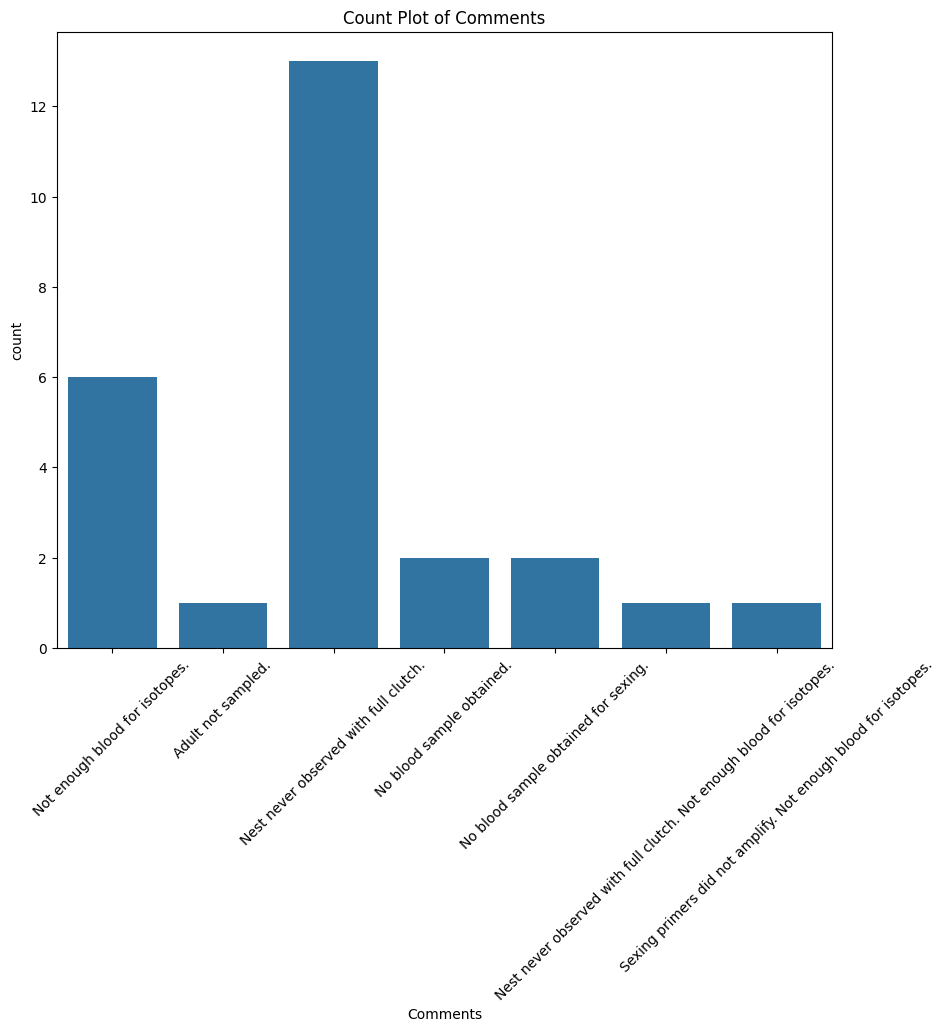

In [ ]:
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    plt.figure(figsize=(10, 8))
    sns.countplot(data=df, x=col)
    plt.title(f"Count Plot of {col}", fontsize=12)
    plt.xticks(rotation=45)
    plt.show()


**Pairplot of Numerical Features by Species**

Dataset loaded successfully!


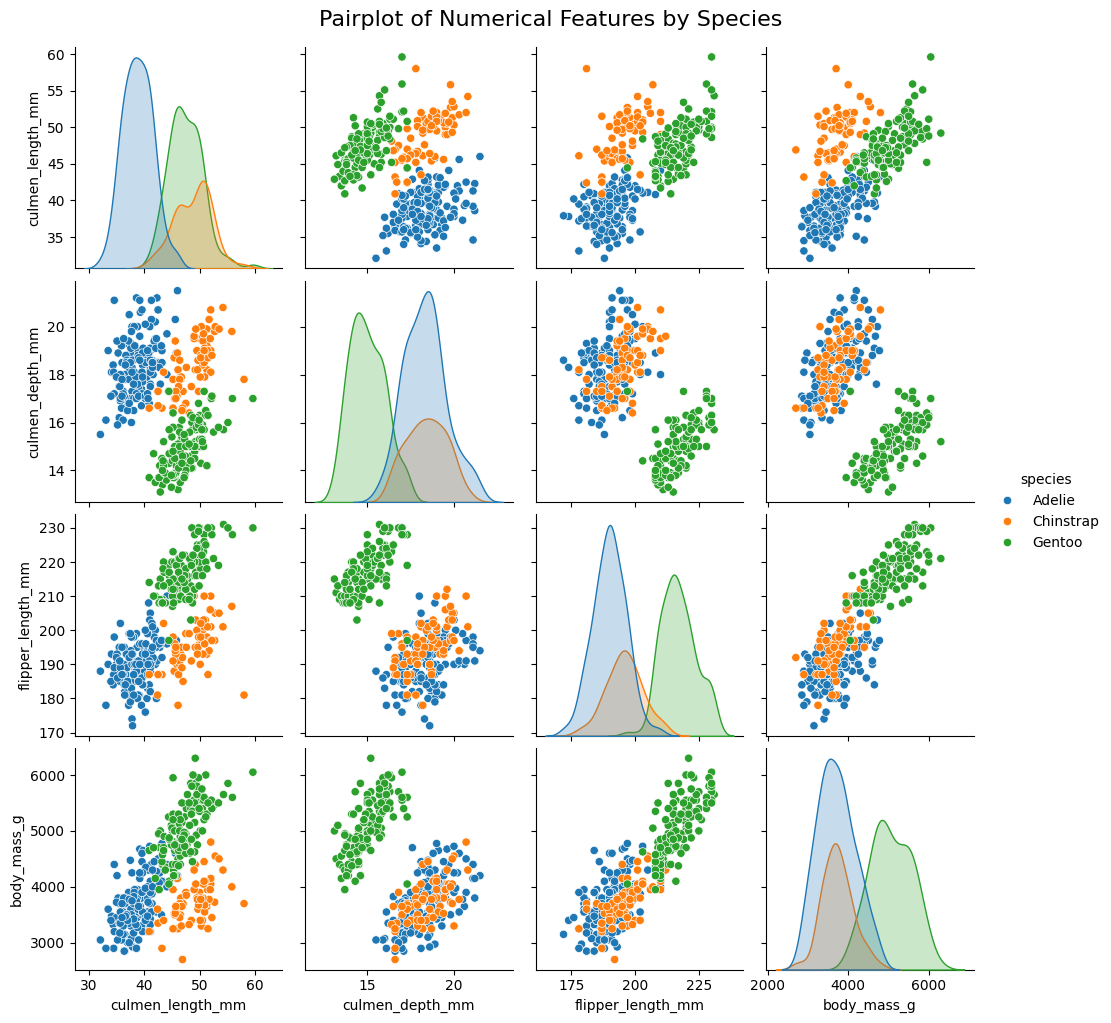

In [ ]:
try:
    df = pd.read_excel("penguins_size.xlsx.xlsx")
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: 'penguins_size.xlsx.xlsx' not found.  Make sure the file is in the correct directory or upload it.")
    exit()

# Clean column names (remove spaces, lowercase)
df.columns = df.columns.str.replace(' ', '_').str.lower()

# Handle missing values
for col in df.columns:
    if df[col].isnull().any():
        if pd.api.types.is_numeric_dtype(df[col]):
            df[col] = df[col].fillna(df[col].median())
        else:
            df[col] = df[col].fillna(df[col].mode()[0])

# Convert species column to string type
df['species'] = df['species'].astype(str)

# --- Attempt to create pairplot, with error handling ---
try:
    sns.pairplot(df, hue='species')
    plt.suptitle("Pairplot of Numerical Features by Species", fontsize=16, y=1.02)
    plt.show()

except (KeyError, ValueError) as e:
    print(f"Error creating pairplot: {e}")
    print("Check if 'species' column exists and has valid categorical data.")
    print("Displaying pairplot without 'hue'.")
    sns.pairplot(df)  # Create a pairplot *without* the 'hue' argument
    plt.suptitle("Pairplot of Numerical Features", fontsize=16, y=1.02)
    plt.show()
except TypeError as e:
  print(f"Type error: {e}. Make sure your numerical columns do not have mixed types")
except ValueError as e:
  print(f"ValueError: {e}. Check that hue is a string")


**Preprocess the penguins dataset, including handling missing values, encoding categorical variables, and scaling features**

In [ ]:
# 1. Load the Data
try:
    df = pd.read_excel("penguins_size.xlsx.xlsx")
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: 'penguins_size.xlsx.xlsx' not found.  Make sure the file is in the correct directory or upload it.")
    exit()

# 2. Data Inspection
print("\nFirst 5 rows of the dataset:\n", df.head())
print("\nData types and missing values:\n", df.info())
print("\nMissing values per column:\n", df.isnull().sum())

# 3. Data Cleaning
# Clean column names (remove spaces, lowercase)
df.columns = df.columns.str.replace(' ', '_').str.lower()

# Drop rows with completely missing values
df.dropna(how='all', inplace=True)

# 4. Identify Target Variable
TARGET = 'species'

# 5. Separate Features (X) and Target (y)

X = df.drop(TARGET, axis=1)  # Features
y = df[TARGET] # Target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\nShape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

# 6. Define Preprocessing Steps
# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=np.number).columns.tolist()
categorical_cols = X.select_dtypes(include='object').columns.tolist()

print("\nNumerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)

# Create preprocessing pipelines for numerical and categorical features
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Handle missing numerical values
    ('scaler', StandardScaler()) # Scale numerical features
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')), # Handle missing categorical values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

# Combine the pipelines using ColumnTransformer
preprocessor = ColumnTransformer([
    ('numerical', numerical_pipeline, numerical_cols),
    ('categorical', categorical_pipeline, categorical_cols)
])

# 7. Apply Preprocessing to Training Data
X_train_processed = preprocessor.fit_transform(X_train)
print("\nShape of X_train_processed:", X_train_processed.shape)

# 8. Apply Preprocessing to Test Data
X_test_processed = preprocessor.transform(X_test)
print("Shape of X_test_processed:", X_test_processed.shape)

# 9. Display Processed Data
print("\nFirst 5 rows of X_train_processed (numpy array):\n", X_train_processed[:5])


Dataset loaded successfully!

First 5 rows of the dataset:
   species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen               NaN              NaN                NaN   
4  Adelie  Torgersen              36.7             19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   3

***Feature engineering to improve the dataset’s predictive power ***

In [ ]:
# 1. Load the Data
try:
    df = pd.read_excel("penguins_size.xlsx.xlsx")
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: 'penguins_size.xlsx.xlsx' not found. Make sure the file is in the correct directory or upload it.")
    exit()

# 2. Data Cleaning
df.columns = df.columns.str.replace(' ', '_').str.lower()
df.dropna(how='all', inplace=True)

# 3. Handle Missing Values
for col in df.columns:
    if df[col].isnull().any():
        if pd.api.types.is_numeric_dtype(df[col]):
            df[col] = df[col].fillna(df[col].median())
        else:
            df[col] = df[col].fillna(df[col].mode()[0])

# Ensure 'sex' is a string
df['sex'] = df['sex'].astype(str)
# A. Body Mass Index (BMI)
# Convert body mass to kg and culmen_length_mm to meters
df['body_mass_kg'] = df['body_mass_g'] / 1000
df['culmen_length_m'] = df['culmen_length_mm'] / 1000

# Calculate BMI (Body Mass Index) = mass (kg) / (height (m))^2
# Use culmen length as a proxy for height
df['bmi'] = df['body_mass_kg'] / (df['culmen_length_m']**2)

# B. Culmen Ratio (Culmen Length / Culmen Depth)
df['culmen_ratio'] = df['culmen_length_mm'] / df['culmen_depth_mm']

# C. Flipper Length Ratio (Flipper Length / Body Mass)
df['flipper_length_ratio'] = df['flipper_length_mm'] / df['body_mass_g']

# D. Island Interaction Feature
# Create dummy variables for each island
island_dummies = pd.get_dummies(df['island'], prefix='island')
df = pd.concat([df, island_dummies], axis=1)
df.drop('island', axis=1, inplace=True)  # Remove original 'island' column

# E. Combined Culmen Dimensions
df['culmen_combined'] = df['culmen_length_mm'] + df['culmen_depth_mm']

# Print out the first 5 rows to see new features
print("\nFirst 5 rows with new features:\n", df.head())

# 5. Separate Features (X) and Target (y)
TARGET = 'species'
X = df.drop(TARGET, axis=1)
y = df[TARGET]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 6. Define Preprocessing Steps
numerical_cols = X.select_dtypes(include=np.number).columns.tolist()
categorical_cols = X.select_dtypes(include='object').columns.tolist()

numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Dropping categorical features because interaction with one-hot-encoder
categorical_cols = []

preprocessor = ColumnTransformer([
    ('numerical', numerical_pipeline, numerical_cols),
    ('categorical', categorical_pipeline, categorical_cols)
])

# 7. Apply Preprocessing
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print("\nShape of X_train_processed:", X_train_processed.shape)
print("Shape of X_test_processed:", X_test_processed.shape)


Dataset loaded successfully!

First 5 rows with new features:
   species  culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
0  Adelie             39.10             18.7              181.0       3750.0   
1  Adelie             39.50             17.4              186.0       3800.0   
2  Adelie             40.30             18.0              195.0       3250.0   
3  Adelie             44.45             17.3              197.0       4050.0   
4  Adelie             36.70             19.3              193.0       3450.0   

      sex  body_mass_kg  culmen_length_m          bmi  culmen_ratio  \
0    MALE          3.75          0.03910  2452.888194      2.090909   
1  FEMALE          3.80          0.03950  2435.507130      2.270115   
2  FEMALE          3.25          0.04030  2001.120628      2.238889   
3    MALE          4.05          0.04445  2049.800018      2.569364   
4  FEMALE          3.45          0.03670  2561.456392      1.901554   

   flipper_length_ratio  isla

**Visualize Distribution of Newly Engineered Features**

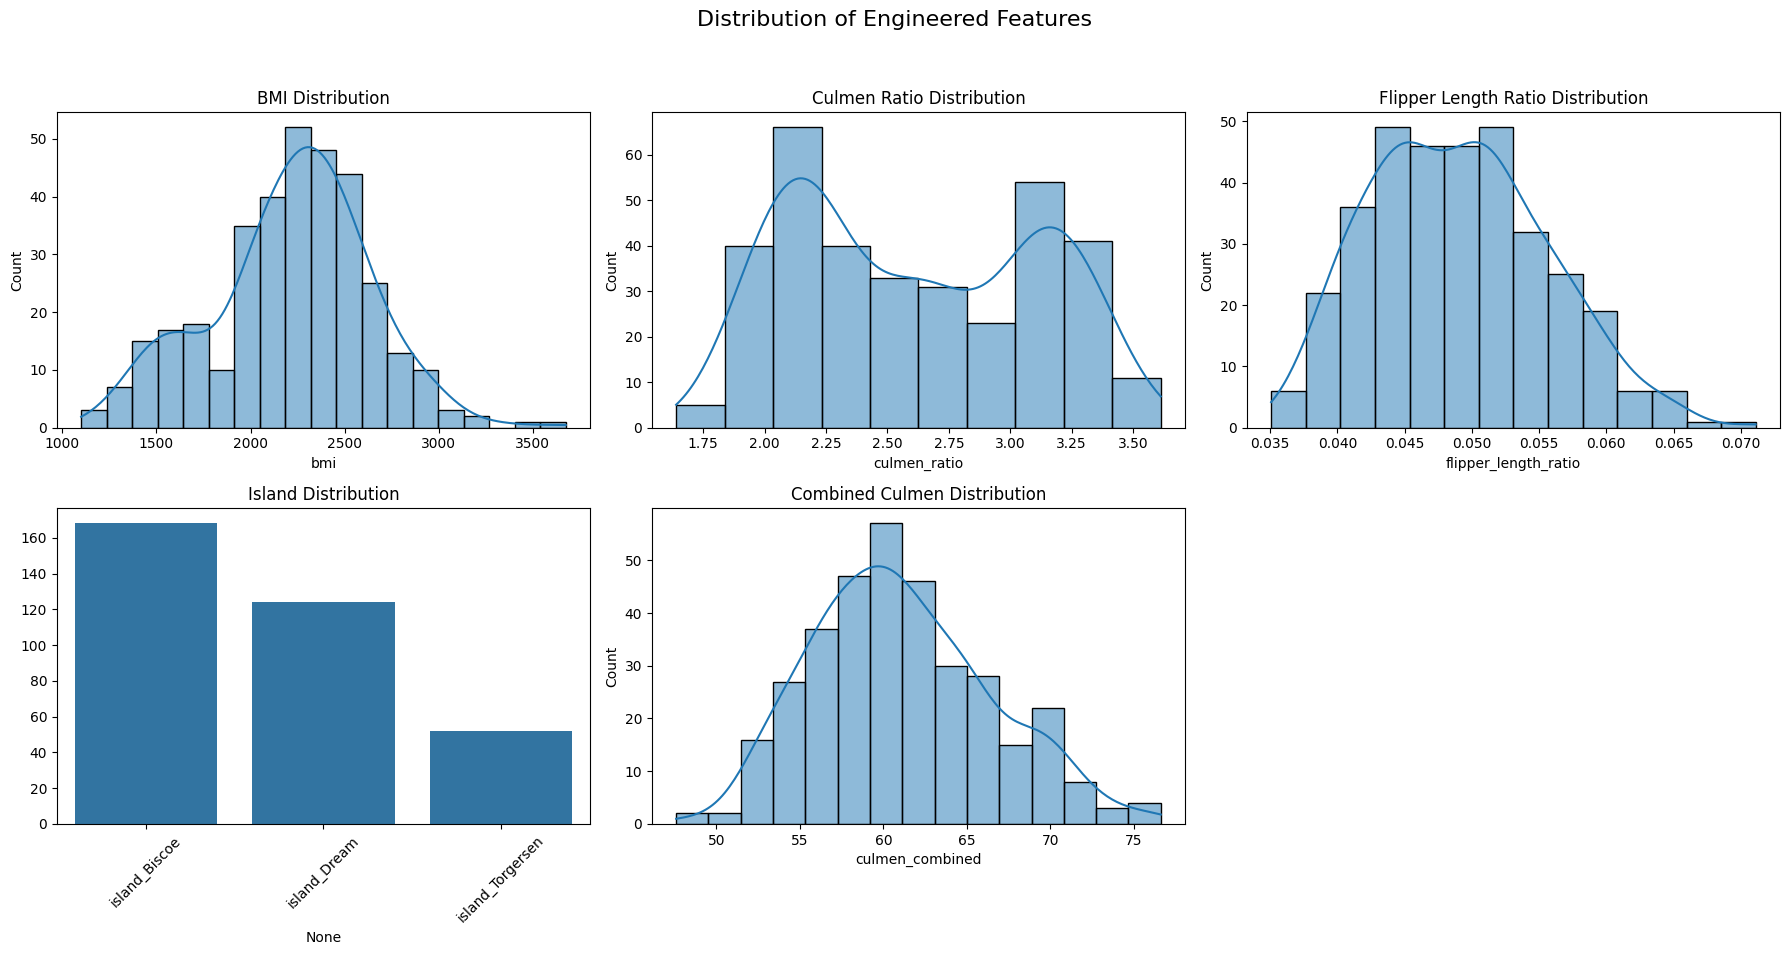

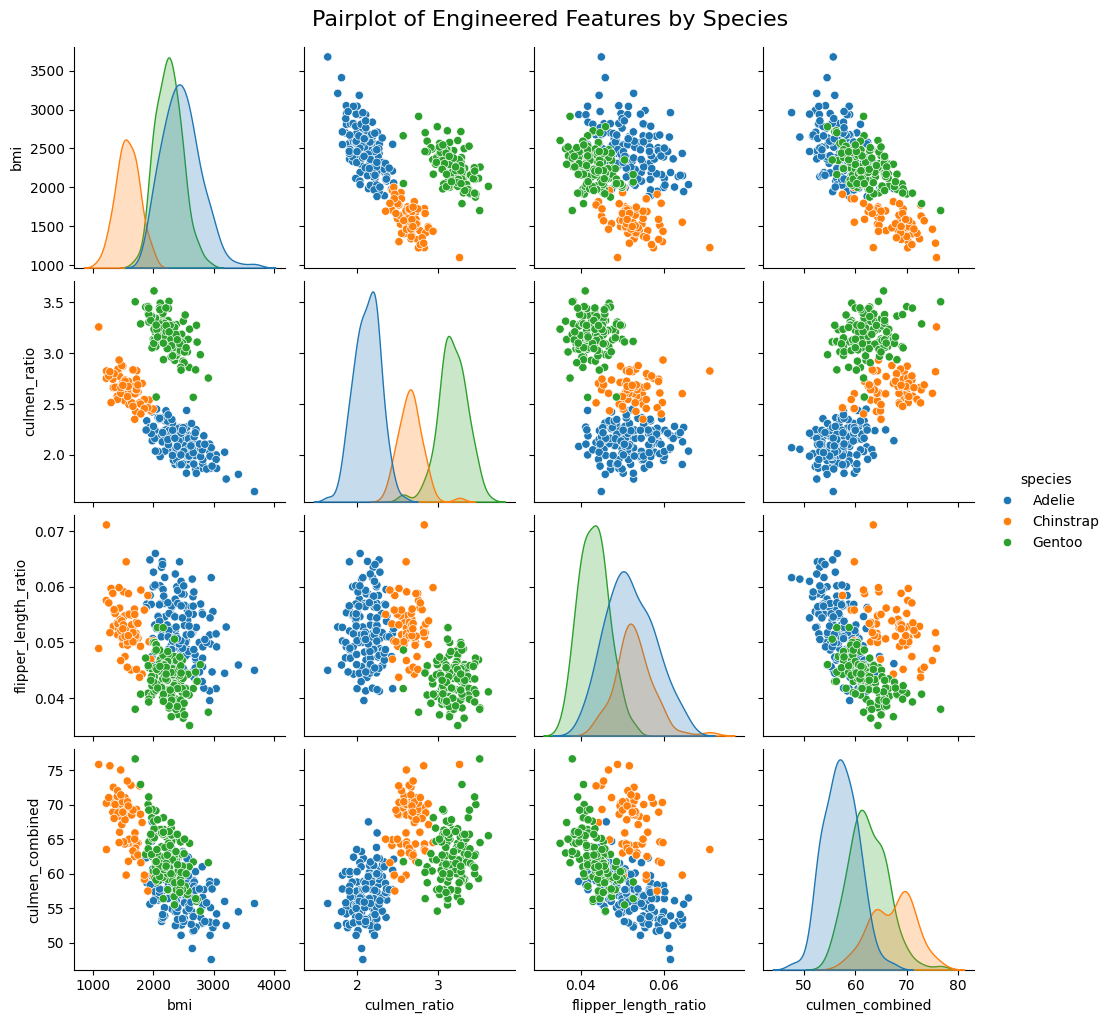

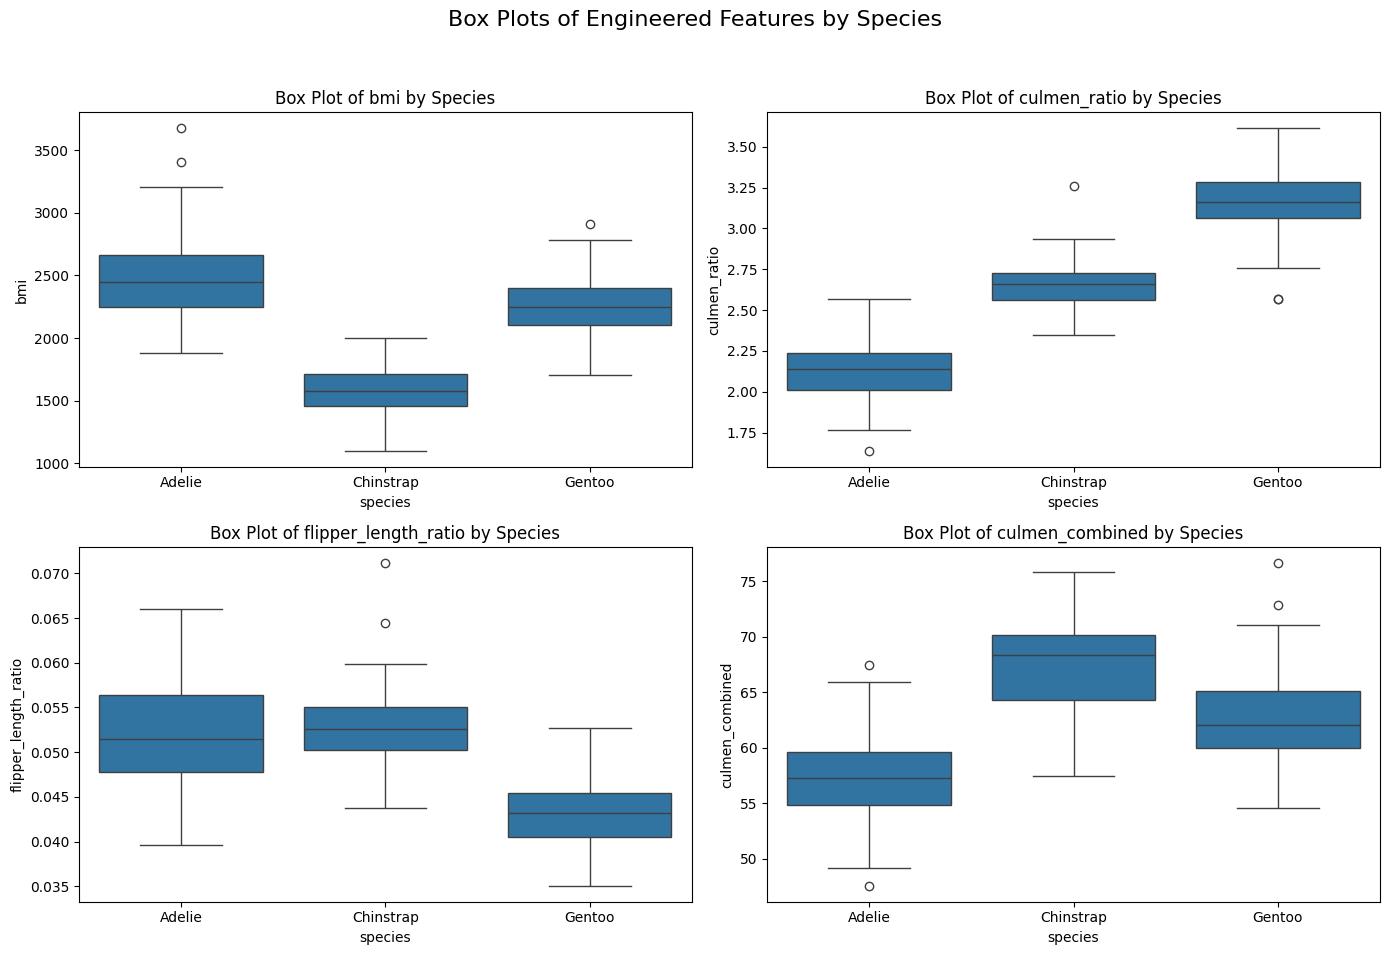

In [ ]:
# Set up the figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
fig.suptitle('Distribution of Engineered Features', fontsize=16)

# 1. BMI Distribution
sns.histplot(df['bmi'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('BMI Distribution')

# 2. Culmen Ratio Distribution
sns.histplot(df['culmen_ratio'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Culmen Ratio Distribution')

# 3. Flipper Length Ratio Distribution
sns.histplot(df['flipper_length_ratio'], kde=True, ax=axes[0, 2])
axes[0, 2].set_title('Flipper Length Ratio Distribution')

# 4. Island Distribution
island_cols = [col for col in df.columns if 'island_' in col]
island_counts = df[island_cols].sum()
sns.barplot(x=island_counts.index, y=island_counts.values, ax=axes[1, 0])
axes[1, 0].set_title('Island Distribution')
axes[1, 0].tick_params(axis='x', rotation=45)

# 5. Combined Culmen Distribution
sns.histplot(df['culmen_combined'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Combined Culmen Distribution')

# Remove the empty subplot if the number of features is less than expected
if len(df.columns) < 6:
    fig.delaxes(axes[1, 2])
else:
    axes[1, 2].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to prevent overlap
plt.show()

# Visualizing the Relationship between Engineered Features and Species
# Pairplot of Engineered Features by Species

engineered_features = ['bmi', 'culmen_ratio', 'flipper_length_ratio', 'culmen_combined']
sns.pairplot(df, vars=engineered_features, hue='species')
plt.suptitle("Pairplot of Engineered Features by Species", fontsize=16, y=1.02)
plt.show()

# Box Plots of Engineered Features by Species
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
fig.suptitle('Box Plots of Engineered Features by Species', fontsize=16)

for i, feature in enumerate(engineered_features):
    row = i // 2
    col = i % 2
    sns.boxplot(x='species', y=feature, data=df, ax=axes[row, col])
    axes[row, col].set_title(f'Box Plot of {feature} by Species')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Applying machine learning algorithms to build a model for prediction using the processed penguins dataset**

**Model Bulding & Evaluation (Decision Tree Model Training)**

In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_processed, y_train)

dt_predictions = dt_model.predict(X_test_processed)
dt_accuracy = accuracy_score(y_test, dt_predictions)

print("\nDecision Tree Accuracy:", dt_accuracy)
print("\nDecision Tree Classification Report:\n", classification_report(y_test, dt_predictions))



Decision Tree Accuracy: 0.9855072463768116

Decision Tree Classification Report:
               precision    recall  f1-score   support

      Adelie       1.00      0.97      0.98        30
   Chinstrap       0.93      1.00      0.97        14
      Gentoo       1.00      1.00      1.00        25

    accuracy                           0.99        69
   macro avg       0.98      0.99      0.98        69
weighted avg       0.99      0.99      0.99        69



**Display Confusion Matrix for Decision Tree**

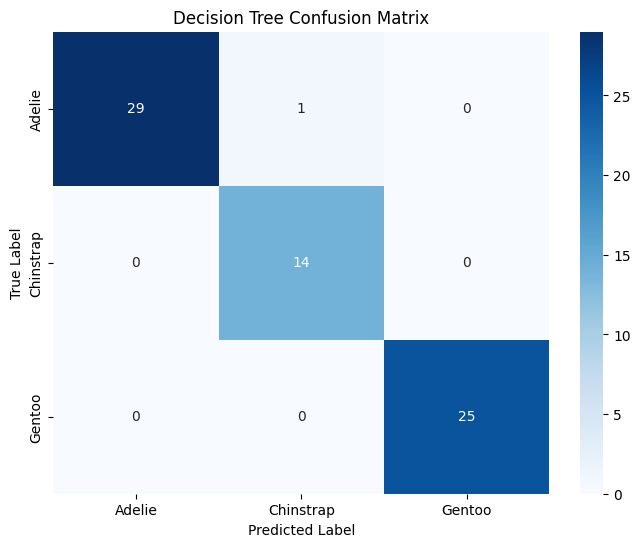

In [ ]:
# Display Confusion Matrix for Decision Tree
cm_dt = confusion_matrix(y_test, dt_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues", xticklabels=dt_model.classes_, yticklabels=dt_model.classes_)
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

**Logistic Regression Model**

In [ ]:

lr_model = LogisticRegression(random_state=42, solver='liblinear', multi_class='ovr') # 'ovr' for multiclass
lr_model.fit(X_train_processed, y_train)

lr_predictions = lr_model.predict(X_test_processed)
lr_accuracy = accuracy_score(y_test, lr_predictions)

print("\nLogistic Regression Accuracy:", lr_accuracy)
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, lr_predictions))



Logistic Regression Accuracy: 1.0

Logistic Regression Classification Report:
               precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        30
   Chinstrap       1.00      1.00      1.00        14
      Gentoo       1.00      1.00      1.00        25

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


**Display Confusion Matrix for Logistic Regression**

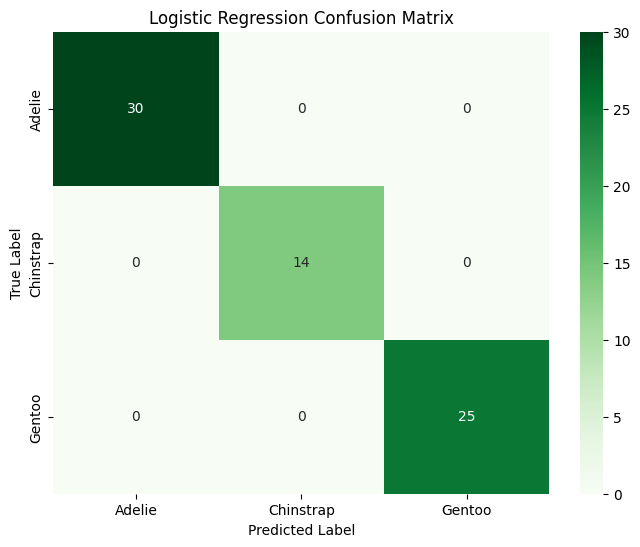

In [ ]:

cm_lr = confusion_matrix(y_test, lr_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Greens", xticklabels=lr_model.classes_, yticklabels=lr_model.classes_)
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

**Cross Validation between two models**

In [ ]:
print("\n--- Cross-Validation ---")
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

dt_cv_scores = cross_val_score(dt_model, X_train_processed, y_train, cv=cv_strategy, scoring='accuracy')
print("Decision Tree Cross-Validation Accuracy:", dt_cv_scores.mean())

lr_cv_scores = cross_val_score(lr_model, X_train_processed, y_train, cv=cv_strategy, scoring='accuracy')
print("Logistic Regression Cross-Validation Accuracy:", lr_cv_scores.mean())


--- Cross-Validation ---
Decision Tree Cross-Validation Accuracy: 0.96
Logistic Regression Cross-Validation Accuracy: 0.9818181818181818


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was depre

**F1-Score**

In [ ]:

dt_f1 = f1_score(y_test, dt_predictions, average='weighted')
lr_f1 = f1_score(y_test, lr_predictions, average='weighted')
print("\n--- F1-Score ---")
print("Decision Tree F1-Score:", dt_f1)
print("Logistic Regression F1-Score:", lr_f1)


--- F1-Score ---
Decision Tree F1-Score: 0.9856343014933212
Logistic Regression F1-Score: 1.0


**Learning curves plot the training accuracy and validation accuracy as a function of the number of training samples.**

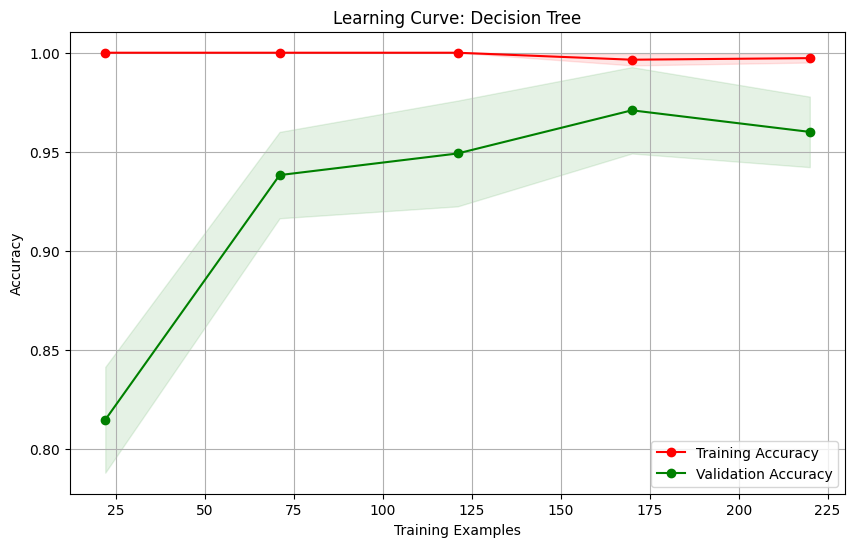

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was depre

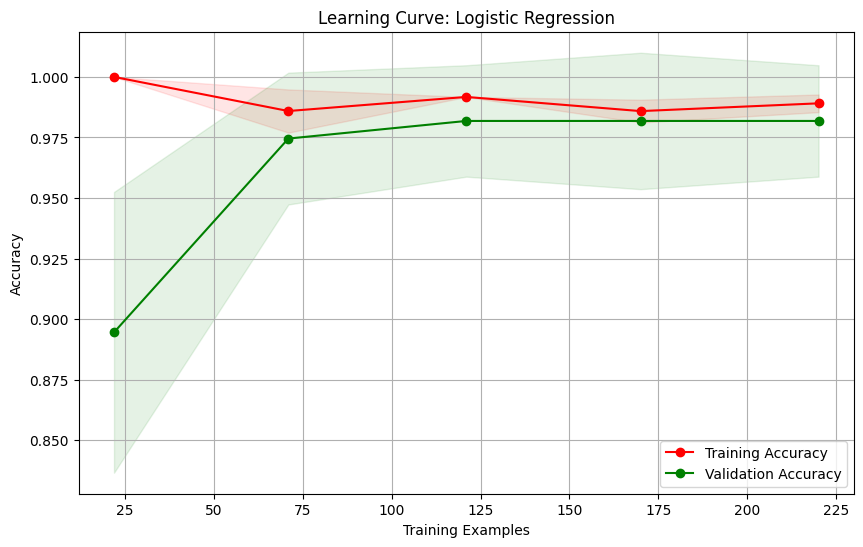

In [ ]:


def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=None):
    """
    Function to plot the learning curve for a given model.
    """
    train_sizes, train_scores, test_scores = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        scoring='accuracy',
        n_jobs=n_jobs,
        train_sizes=np.linspace(0.1, 1.0, 5),
        random_state=42
    )

    # Calculate mean and standard deviation for training and validation scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Training Examples")
    plt.ylabel("Accuracy")
    plt.grid()

    # Plot shaded regions for standard deviation
    plt.fill_between(train_sizes,
                     train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std,
                     alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes,
                     test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std,
                     alpha=0.1,
                     color="g")

    # Plot mean training and validation scores
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Accuracy")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Validation Accuracy")

    plt.legend(loc="best")
    return plt

# Plot learning curve for Decision Tree
plot_learning_curve(dt_model, "Learning Curve: Decision Tree", X_train_processed, y_train, cv=cv_strategy)
plt.show()

# Plot learning curve for Logistic Regression
plot_learning_curve(lr_model, "Learning Curve: Logistic Regression", X_train_processed, y_train, cv=cv_strategy)
plt.show()


**Check for Overfitting**

***Scalability & Performamnce of the models ***

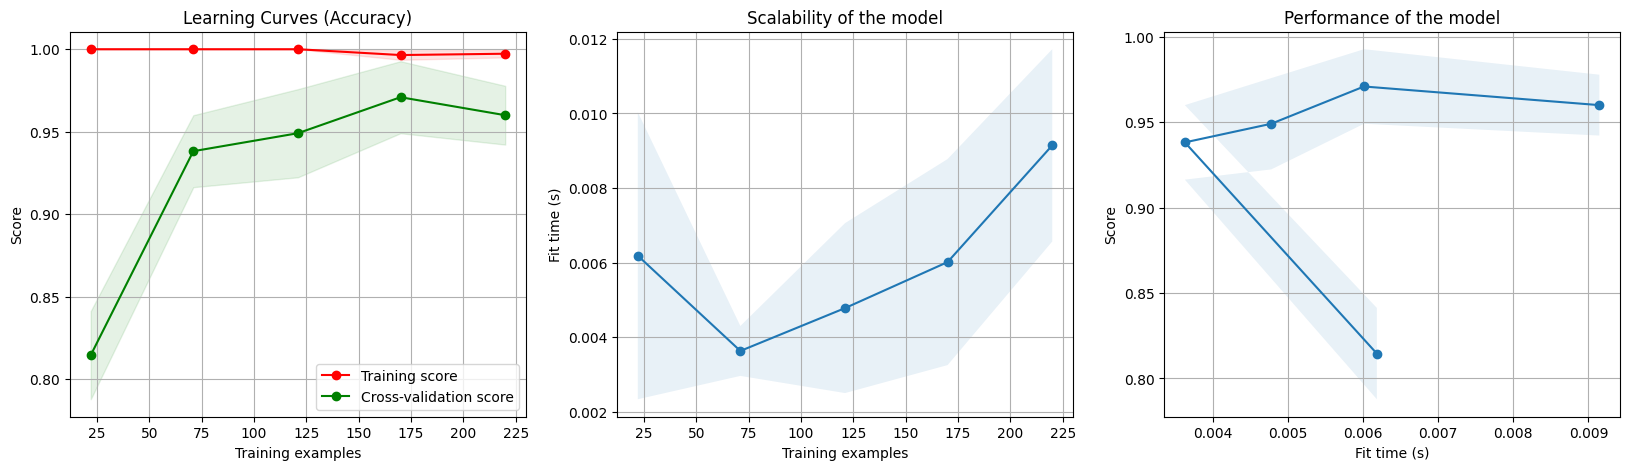

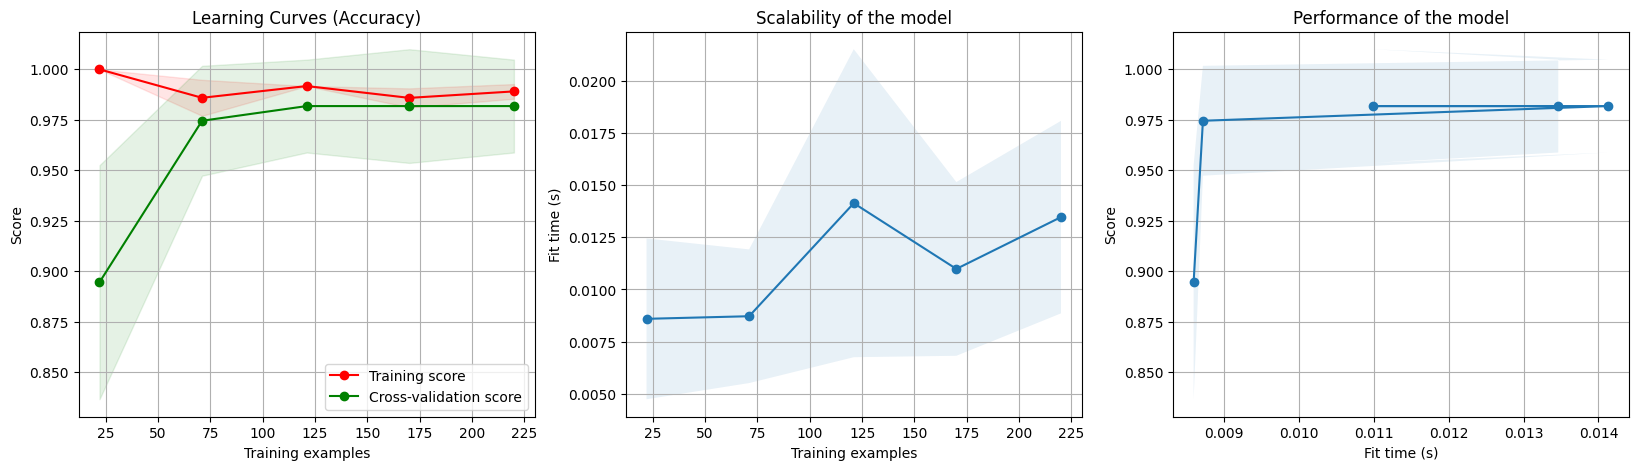

In [ ]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where `n_samples` is the number of samples and
        `n_features` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_outputs)
        Target relative to `X` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (ymin, ymax), default=None
        Define minimum and maximum y values plotted, e.g. (0, 1).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds in a (Stratified)KFold,
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if the estimator is a classifier and ``y`` is
        either binary or multiclass, :class:`StratifiedKFold` is used. In all
        other cases, :class:`KFold` is used. These splitters are instantiated
        with `shuffle=False` so the splits will still be the same even
        when ``shuffle=True``.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,), default=np.linspace(0.1, 1.0, 5)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. Relative numbers are automatically converted
        to absolute numbers based on the size of the training set. By default,
        equal spaced points between 0.1 and 1.0 are used.
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title("Learning Curves (Accuracy)")
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        scoring="accuracy",
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)
  # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(train_sizes, train_scores_mean, "o-", color="r", label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].set_title("Scalability of the model")
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("Fit time (s)")
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )

    # Plot fit_time vs score
    axes[2].set_title("Performance of the model")
    axes[2].set_xlabel("Fit time (s)")
    axes[2].set_ylabel("Score")
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, "o-")
    axes[2].fill_between(
        fit_times_mean,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
    )

    return plt


fig, axes = plt.subplots(1, 3, figsize=(20, 5))
plot_learning_curve(dt_model, "Decision Tree Learning Curve", X_train_processed, y_train, axes=axes, cv=cv_strategy, n_jobs=4)
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(20, 5))
plot_learning_curve(lr_model, "Logistic Regression Learning Curve", X_train_processed, y_train, axes=axes, cv=cv_strategy, n_jobs=4)
plt.show()